# Proyecto Final

### Integrantes:
* Daniel Cifuentes
* Andrea Rivas

In [46]:
# Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Extra
from sklearn.model_selection import train_test_split

In [2]:
data = pd.DataFrame(np.load('./data/proyecto_training_data.npy'))
data

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [3]:
# Separación de train (80%) y test (20%)
train, test = train_test_split(data, test_size = 0.2)

In [4]:
# Resumen 
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 455 to 385
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1168 non-null   float64
 1   1       1168 non-null   float64
 2   2       1168 non-null   float64
 3   3       1168 non-null   float64
 4   4       1168 non-null   float64
 5   5       954 non-null    float64
dtypes: float64(6)
memory usage: 63.9 KB


## 3. Análisis Exploratorio

In [5]:
# Media 
train.mean()

0    182615.795377
1         6.113014
2      1164.388699
3         6.523973
4      1971.658390
5        70.417191
dtype: float64

In [6]:
# Valores máximos
train.max()

0    755000.0
1        10.0
2      4692.0
3        14.0
4      2010.0
5       313.0
dtype: float64

In [7]:
# Valores mínimos
train.min()

0    34900.0
1        1.0
2      334.0
3        2.0
4     1872.0
5       21.0
dtype: float64

In [8]:
# Rango

In [8]:
# Desviación estándar
train.std()

0    81079.110982
1        1.401151
2      395.080450
3        1.638580
4       30.366184
5       24.982217
dtype: float64

## 4. Histogramas

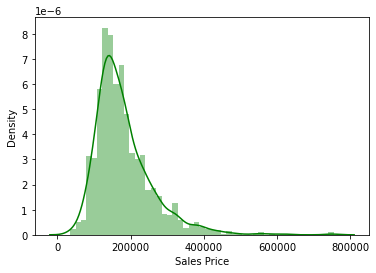

In [31]:
price_hist = sns.distplot(data[0], color="g", axlabel= "Sales Price")

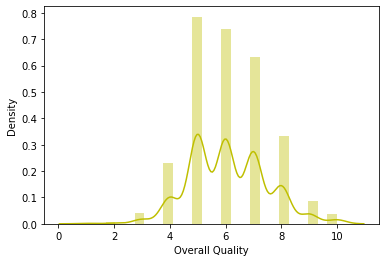

In [32]:
qual_hist = sns.distplot(data[1], axlabel= "Overall Quality", color= "y")

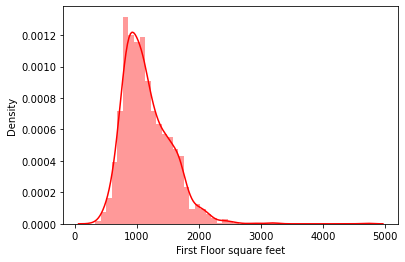

In [33]:
first_hist = sns.distplot(data[2], axlabel= "First Floor square feet", color="r")

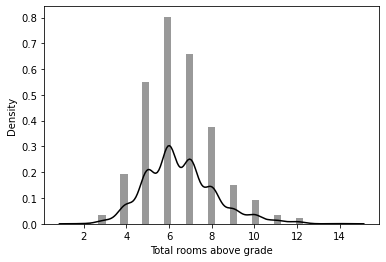

In [34]:
room_hist = sns.distplot(data[3], axlabel= "Total rooms above grade", color="k")

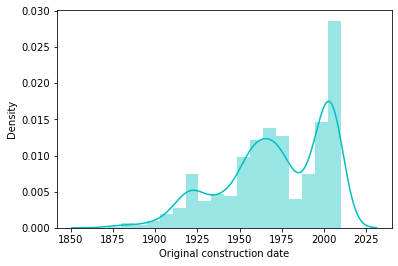

In [36]:
year_hist = sns.distplot(data[4], axlabel= "Original construction date", color="c")

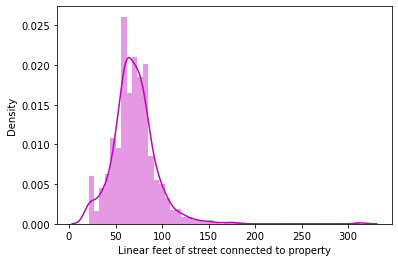

In [38]:
front_hist = sns.distplot(data[5], axlabel= "Linear feet of street connected to property", color="m")

## 5. Análisis de Selección de Variables

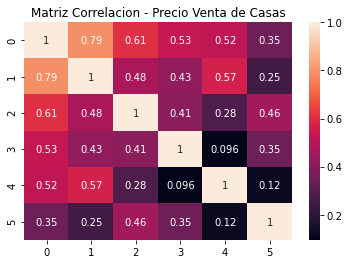

In [57]:
correlation_mat = data.corr()
correlation = sns.heatmap(correlation_mat, annot=True)
plt.title("Matriz Correlacion - Precio Venta de Casas")
plt.show()

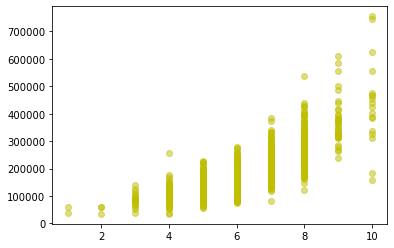

array([[1.       , 0.7909816],
       [0.7909816, 1.       ]])

In [63]:
#y = Sales Price --> data[0]
qual_coef = np.corrcoef(data[1],data[0])
plt.scatter(data[1],data[0], c = "y", alpha = 0.5)
plt.show()
qual_coef

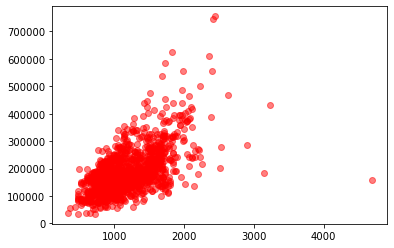

array([[1.        , 0.60585218],
       [0.60585218, 1.        ]])

In [62]:
first_coef = np.corrcoef(data[2],data[0])
plt.scatter(data[2],data[0],c = "r", alpha = 0.5)
plt.show()
first_coef

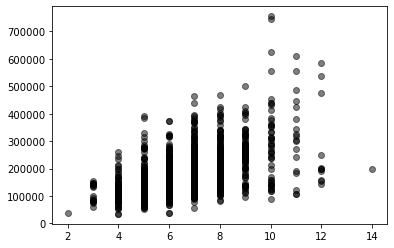

array([[1.        , 0.53372316],
       [0.53372316, 1.        ]])

In [61]:
room_coef = np.corrcoef(data[3],data[0])
plt.scatter(data[3],data[0], c = "k", alpha = 0.5)
plt.show()
room_coef

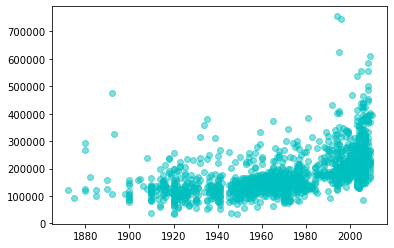

array([[1.        , 0.52289733],
       [0.52289733, 1.        ]])

In [60]:
year_coef = np.corrcoef(data[4], data[0])
plt.scatter(data[4],data[0], c = "c", alpha = 0.5)
plt.show()
year_coef

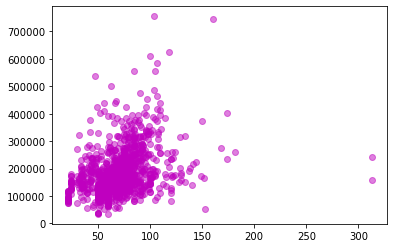

array([[nan, nan],
       [nan,  1.]])

In [59]:
front_coef = np.corrcoef(data[5], data[0])
plt.scatter(data[5],data[0], c = "m", alpha = 0.5)
plt.show()
front_coef

Se seleccionan las variables de "Overall Quality" y la variable "1stFlrSF", ya que son las dos variables que presentan una mayor correlación con nuestra variable dependiente y = "Sales Price".  

In [20]:
# y = β0 + β1 ∗ x
b0 = 15
b1 = 1
a = 0.15
data2 = pd.DataFrame({'x': [1, 3, 4, 5, 6], 'y': [20, 25, 30, 40, 55]})
data2

0       208493.0
1       181494.0
2       223493.0
3       139993.0
4       249992.0
          ...   
1455    174994.0
1456    209994.0
1457    266493.0
1458    142120.0
1459    147495.0
Length: 1460, dtype: float64

In [ ]:
y_s = b0 + data2.x * b1
error = ((data2.y - y_s) ** 2).sum()/(2 * data2.y.count())
error

In [ ]:
#Gradiente b0
gb0 = ((y_s - y).sum())/y_s.count()
gb0

In [ ]:
# Gradiente b1
gb1 = (((y_s - y) * data2.x).sum())/y_s.count()
gb1

In [ ]:
#Nuevos valores de b0 y b1
nb0 = b0 - a * gb0
nb1 = b1 - a * gb1
nb0
nb1

In [ ]:
def regresion_lineal(x, y, epoch, iec, a): # iec-> imprimir error cada
#Hola